In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import netCDF4 as nc
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
amoc_data = pd.read_csv('amoc_averaged.txt',sep='\t', header=None, names=["AMOC", "Year", "Trajectory"])

In [3]:
amoc_data.head()

,AMOC,Year,Trajectory
0,Averaged AMOC Index (NADW)\Year\Trajectory ID,NaN,NaN
1,19.6229,1.0,1.0
2,19.4233,1.0,2.0
3,19.3161,1.0,3.0
4,19.7528,1.0,4.0


In [4]:
amoc = amoc_data.iloc[1:,]
amoc.head()

,AMOC,Year,Trajectory
1,19.6229,1.0,1.0
2,19.4233,1.0,2.0
3,19.3161,1.0,3.0
4,19.7528,1.0,4.0
5,19.544,1.0,5.0


In [5]:
amoc['AMOC']=amoc['AMOC'].astype(float)

/var/folders/v1/ymptnwwx3x1b7_mw0nns09wr0000gn/T/ipykernel_59836/1453111854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amoc['AMOC']=amoc['AMOC'].astype(float)


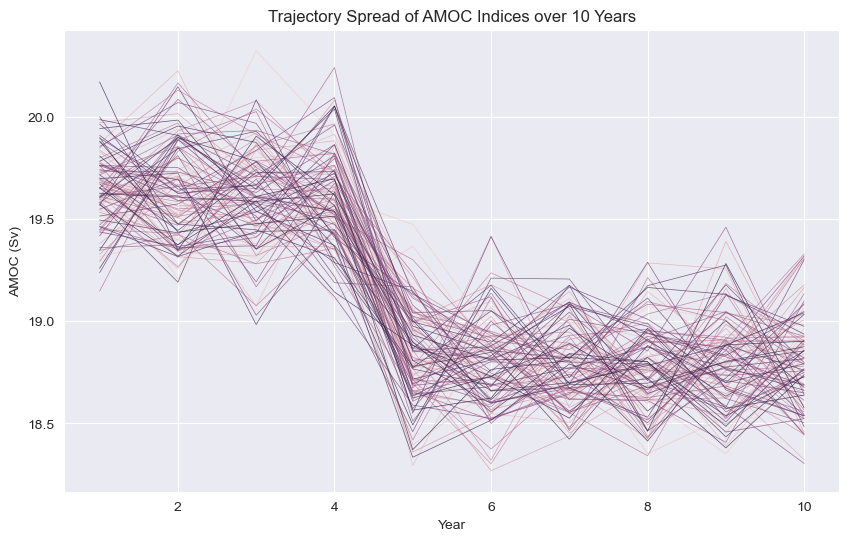

In [6]:
plt.figure(figsize=(10,6))
colors = ['#7abe80','#ffbdbd', '#658e93', '#45954c']
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")
sns.lineplot(data=amoc, x="Year", y="AMOC", hue="Trajectory",
             alpha=0.8, linewidth=0.5, legend=False)
plt.ylabel("AMOC (Sv)")
plt.title('Trajectory Spread of AMOC Indices over 10 Years')
#plt.show()
plt.savefig("AMOC_traj_spread.png")

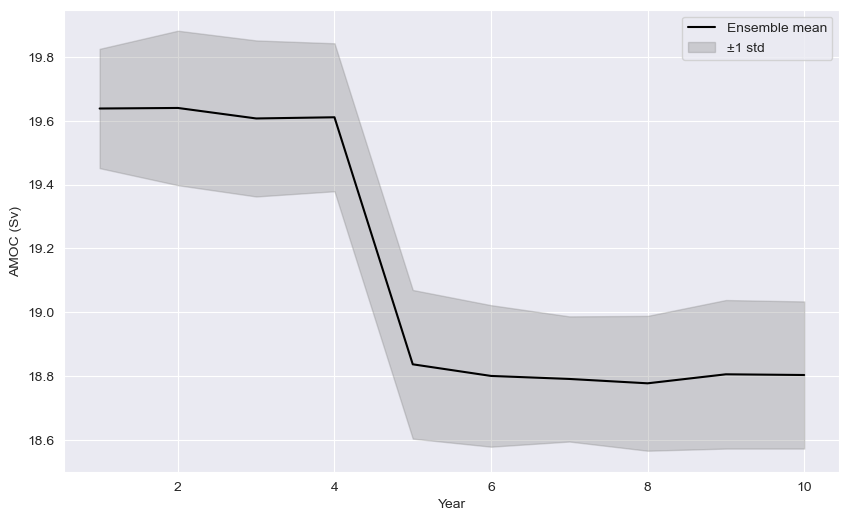

In [7]:
stats = amoc.groupby("Year")["AMOC"].agg(Mean_AMOC="mean", Std_AMOC="std").reset_index()
plt.figure(figsize=(10,6))
plt.plot(stats["Year"], stats["Mean_AMOC"], color="black", label="Ensemble mean")
plt.fill_between(stats["Year"],
                 stats["Mean_AMOC"] - stats["Std_AMOC"],
                 stats["Mean_AMOC"] + stats["Std_AMOC"],
                 color="gray", alpha=0.3, label="±1 std")
plt.xlabel("Year")
plt.ylabel("AMOC (Sv)")
plt.legend()
plt.show()

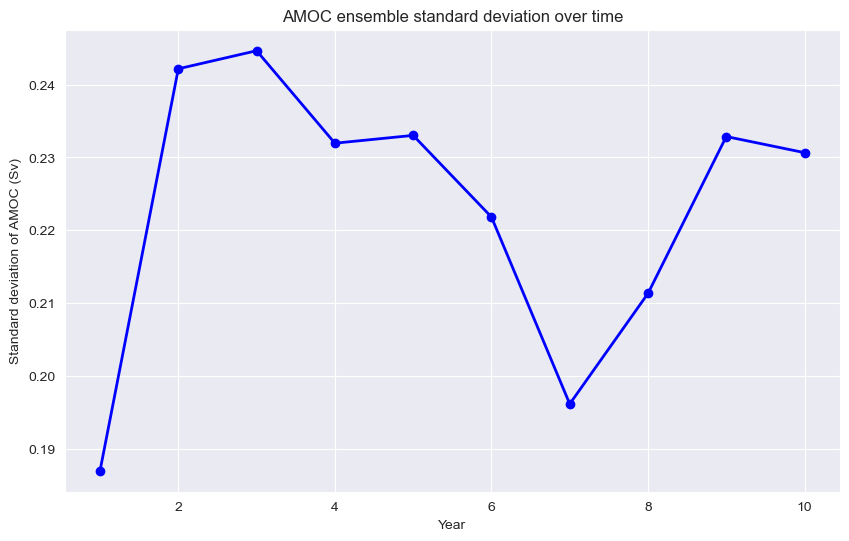

In [8]:
# compute std dev for each year
std_per_year = amoc.groupby("Year")["AMOC"].std().reset_index()

# plot
plt.figure(figsize=(10,6))
plt.plot(std_per_year["Year"], std_per_year["AMOC"], color="blue", marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Standard deviation of AMOC (Sv)")
plt.title("AMOC ensemble standard deviation over time")
plt.grid(True)
#plt.show()
plt.savefig("AMOC_std_dev.png")

In [207]:
sst_df = sst_traj_one.to_dataframe()

In [208]:
sst_df = sst_df.reset_index()

In [212]:
print(sst_df['time_bnds'].unique())
for col in sst_df.columns:
    print(col)
sst_df.head()

[1.0101000e+04 1.0130000e+04 1.0201000e+04 1.0230000e+04 1.0301000e+04
 1.0330000e+04 1.0401000e+04 1.0430000e+04 1.0501000e+04 1.0530000e+04
 1.0601000e+04 1.0630000e+04 1.0701000e+04 1.0730000e+04 1.0801000e+04
 1.0830000e+04 1.0901000e+04 1.0930000e+04 1.1001000e+04 1.1030000e+04
 1.1101000e+04 1.1130000e+04 1.1201000e+04 1.1230000e+04 3.8800201e+07
 3.8800230e+07 3.8800301e+07 3.8800330e+07 3.8800401e+07 3.8800430e+07
 3.8800501e+07 3.8800530e+07 3.8800601e+07 3.8800630e+07 3.8800701e+07
 3.8800730e+07 3.8800801e+07 3.8800830e+07 3.8800901e+07 3.8800930e+07
 3.8801001e+07 3.8801030e+07 3.8801101e+07 3.8801130e+07 3.8801201e+07
 3.8801230e+07 3.8810101e+07 3.8810130e+07 3.9800201e+07 3.9800230e+07
 3.9800301e+07 3.9800330e+07 3.9800401e+07 3.9800430e+07 3.9800501e+07
 3.9800530e+07 3.9800601e+07 3.9800630e+07 3.9800701e+07 3.9800730e+07
 3.9800801e+07 3.9800830e+07 3.9800901e+07 3.9800930e+07 3.9801001e+07
 3.9801030e+07 3.9801101e+07 3.9801130e+07 3.9801201e+07 3.9801230e+07
 3.981

,time,bnds,lon,lat,time_bnds,tas
0,10115.5,0,0.0,85.760587,10101.0,235.281357
1,10115.5,0,0.0,80.268779,10101.0,237.005051
2,10115.5,0,0.0,74.744540,10101.0,248.992569
3,10115.5,0,0.0,69.212976,10101.0,261.197845
4,10115.5,0,0.0,63.678636,10101.0,270.136078


In [150]:
sst_df.head()
print(len(sst_df))
print(sst_df['year'].unique())

442368


KeyError: 'year'

In [217]:
#get just the year
#make a list of unique time_bnds
def make_bounds(df):

    df['year'] = df['time_bnds'].astype(str).str[:4]
    time_bnds_list = df['year'].unique()
    print("Length of years",len(time_bnds_list))
    bounds=[]
    #print length of list
    for time in time_bnds_list:
        bound = df.loc[df['year']==time]
        bounds.append(len(bound))
    #make a new column with a counter, changing at each end of list
    print("Length of list of lengths",len(bounds))
    values=[]
    #get length of bounds
    print("first element in length list:",bounds[0],"second element in length list:",bounds[1])
    bound_length = bounds[0] + bounds[1]
    end_term = int(len(bounds)/3+1)
    for i in range(1, end_term):
        values += [i] * bound_length
    return values

In [221]:
#get just the year for other trajectory where year is different
#make a list of unique time_bnds
def make_bounds(df):

    df['year'] = df['time']//1000
    time_bnds_list = df['year'].unique()
    print("time bounds list:",time_bnds_list)
    print("Length of years",len(time_bnds_list))
    bounds=[]
    #print length of list
    for time in time_bnds_list:
        bound = df.loc[df['year']==time]
        print(bound)
        bounds.append(len(bound))
    #make a new column with a counter, changing at each end of list
    print("Length of list of lengths",len(bounds))
    values=[]
    #get length of bounds
    print("first element in length list:",bounds[0],"second element in length list:",bounds[1])
    bound_length = bounds[0] + bounds[1]
    end_term = int(len(bounds)/3+1)
    for i in range(1, end_term):
        values += [i] * bound_length
    return values

In [151]:
sst_df['Year Counter'] = values

In [152]:
weights = np.cos(np.deg2rad(sst_df['lat']))
sst_df['weighted_tas'] = sst_df['tas'] * weights

<Axes: xlabel='Year Counter', ylabel='weighted_tas'>

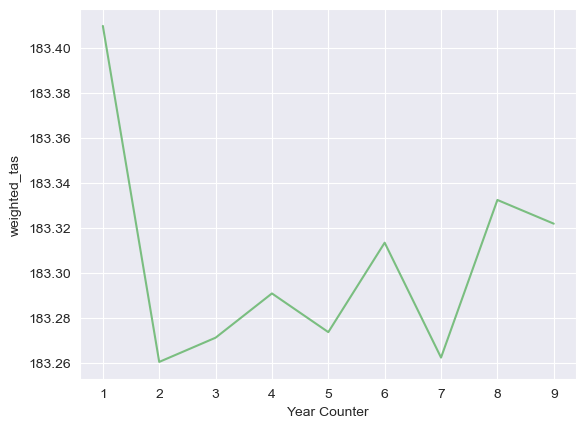

In [153]:
sns.lineplot(data=sst_df,x='Year Counter',y='weighted_tas',errorbar=None)

In [222]:
#ensemble spread and std dev
folder_path='100traj_5year/'
plt.figure()
traj_counter=0
ensemble_list=[]
for file in os.listdir(folder_path):
    if file.endswith(".nc"):
        print(file)
        sst_annual=xr.open_dataset(os.path.join(folder_path, file))
        weights = np.cos(np.deg2rad(sst_annual['lat']))
        
        tas_global = (
            sst_annual['tas']
            .weighted(weights)
            .mean(dim=('lat', 'lon'))
        )
        tas_weighted=tas_global.to_dataframe()
        reset=tas_weighted.reset_index()
        reset['Year Counter'] = make_bounds(reset)
        #weights = np.cos(np.deg2rad(reset['lat']))
        #reset['weighted_tas'] = reset['tas'] * weights
        sns.lineplot(data=reset,x='Year Counter',y='tas',errorbar=None)
        reset['Trajectory ID']=traj_counter
        traj_counter+=1
        ensemble_list.append(reset)
plt.show()
plt.close()
reset.head()

tas_traj0073.nc
time bounds list: [1.0000e+01 1.1000e+01 3.8800e+04 3.8801e+04 3.8810e+04 3.9800e+04
 3.9801e+04 3.9810e+04 4.0790e+04 4.0791e+04 4.0800e+04 4.1790e+04
 4.1791e+04 4.1800e+04]
Length of years 14
      time         tas  year
0  10115.5  282.326668  10.0
1  10215.5  283.049968  10.0
2  10315.5  283.957680  10.0
3  10415.5  285.223913  10.0
4  10515.5  286.666988  10.0
5  10615.5  287.587739  10.0
6  10715.5  287.608266  10.0
7  10815.5  287.298698  10.0
8  10915.5  286.754597  10.0
       time         tas  year
9   11015.5  285.478223  11.0
10  11115.5  284.419734  11.0
11  11215.5  283.250284  11.0
          time         tas     year
12  38800215.5  280.851777  38800.0
13  38800315.5  281.427474  38800.0
14  38800415.5  282.657670  38800.0
15  38800515.5  284.100353  38800.0
16  38800615.5  285.157977  38800.0
17  38800715.5  285.602208  38800.0
18  38800815.5  285.540994  38800.0
19  38800915.5  285.020807  38800.0
          time         tas     year
20  38801015.5  283

ValueError: Length of values (48) does not match length of index (60)

<Figure size 640x480 with 0 Axes>

In [190]:
ensemble['tas'].dtype

dtype('float64')

Year Counter
1     283.402945
2     283.338573
3     283.326644
4     283.371669
5     283.368441
6     283.394322
7     283.389508
8     283.356819
9     283.377559
10    283.363093
Name: tas, dtype: float64


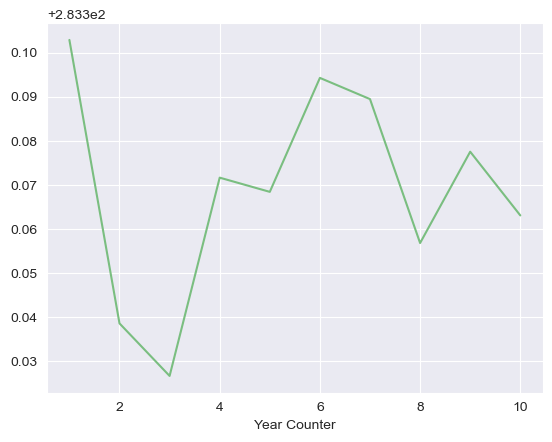

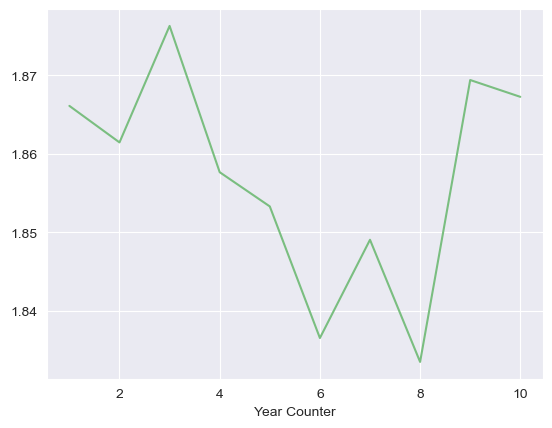

,time,tas,year,Year Counter,Trajectory ID
0,16160215.5,280.848658,1616,1,0
1,16160315.5,281.529713,1616,1,0
2,16160415.5,282.754529,1616,1,0
3,16160515.5,284.477558,1616,1,0
4,16160615.5,285.603778,1616,1,0


In [191]:
#concat dfs
ensemble=pd.concat(ensemble_list,ignore_index=True)
#groupby to get ensemble mean
ensemble_mean=ensemble.groupby('Year Counter')['tas'].mean()
print(ensemble_mean)
#groupby to get ensemble std deviation
ensemble_std=ensemble.groupby('Year Counter')['tas'].std()
#plot
plt.figure()
ensemble_mean.plot()
plt.show()
plt.close()

plt.figure()
ensemble_std.plot()
plt.show()
plt.close()
ensemble.head()